In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/alexnet.keras')

In [24]:
FOLDER = '/content/drive/MyDrive/Colab Notebooks/cat-images'

In [25]:
correct = 0
total = 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted class: 3
predictions: [[2.1179464e-04 3.4458001e-04 1.5016140e-04 9.5892829e-01 4.1189080e-04
  8.4353909e-03 9.9177491e-03 3.5325679e-04 1.8463049e-02 2.7838608e-03]]
Confidence: 0.9589283
Prediction: cat


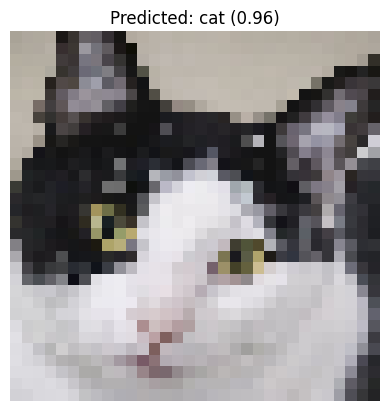

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted class: 6
predictions: [[3.4338502e-06 4.5279407e-07 2.8901433e-03 1.7759394e-03 4.1063849e-02
  4.2325028e-04 9.5382613e-01 1.4522412e-05 4.4130024e-07 1.8670714e-06]]
Confidence: 0.9538261
Prediction: frog


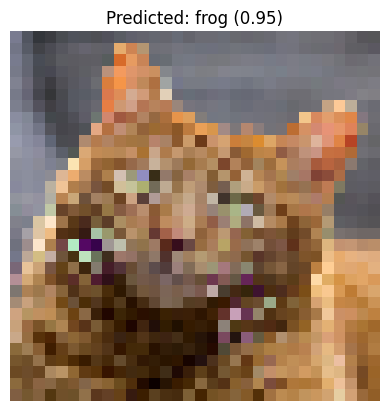

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted class: 3
predictions: [[4.70566919e-10 2.15699569e-09 1.78147434e-06 8.04846525e-01
  4.13957838e-04 1.80177685e-05 1.94716781e-01 3.38699351e-07
  1.10660416e-07 2.32500770e-06]]
Confidence: 0.8048465
Prediction: cat


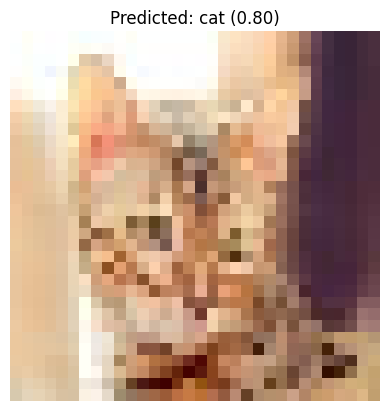

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted class: 6
predictions: [[1.27975932e-06 4.47305041e-07 4.89099875e-05 3.01148314e-02
  5.72974619e-04 1.08212276e-04 9.69074786e-01 3.32124478e-06
  3.24132270e-05 4.26948500e-05]]
Confidence: 0.9690748
Prediction: frog


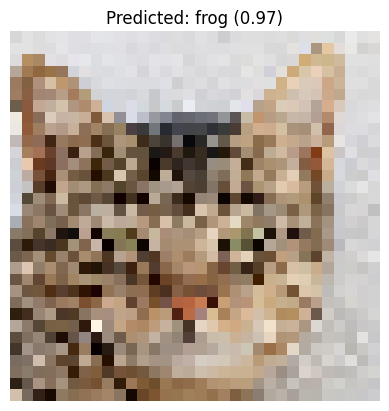

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted class: 4
predictions: [[0.06182513 0.00059552 0.15611397 0.01786822 0.5946504  0.00196471
  0.16128094 0.00207259 0.00159062 0.00203782]]
Confidence: 0.5946504
Prediction: deer


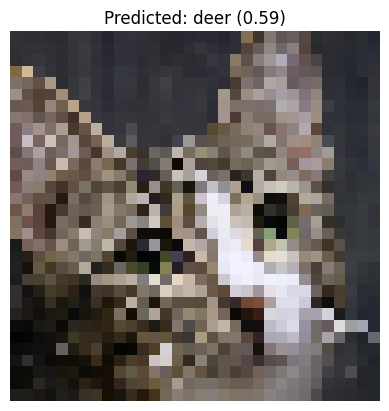

In [27]:
for file in os.listdir(FOLDER):
    if not file.endswith(".png"):
        continue

    path = os.path.join(FOLDER, file)

    img = image.load_img(path, target_size=(32, 32))
    img_array = image.img_to_array(img)

    img_array = img_array / 255.0     # normalize
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    print("Predicted class:", predicted_class)
    print("predictions:", prediction)
    print("Confidence:", confidence)

    class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
    ]

    print("Prediction:", class_names[predicted_class])

    correct += (predicted_class == 3)
    total += 1

    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]} ({confidence:.2f})")
    plt.axis("off")
    plt.show()